In [53]:
import pandas as pd 

df_asig = pd.read_csv('../1_GENERADOR/asignaturas.csv')
df_est = pd.read_csv('../1_GENERADOR/estudiantes.csv')
df_not = pd.read_csv('../1_GENERADOR/notas.csv')


#1:

Eliminar filas que tengan algun valor nulo

________________________________________________________________________________

In [54]:
import pandas as pd

df_asig = pd.read_csv('../1_GENERADOR/asignaturas.csv')
# Elimina filas con el string 'null'
df_asig = df_asig[~df_asig.apply(lambda row: row.astype(str).str.contains("null"), axis=1)]
# Elimina filas con valores NaN
df_asig = df_asig.dropna()
# Elimina filas con celdas vacías
df_asig = df_asig[~(df_asig == '').any(axis=1)]


In [55]:
import pandas as pd

df_est = pd.read_csv('../1_GENERADOR/estudiantes.csv')
# Elimina filas con el string 'null'
df_est = df_est[~df_est.apply(lambda row: row.astype(str).str.contains("null"), axis=1)]
# Elimina filas con valores NaN
df_est = df_est.dropna()
# Elimina filas con celdas vacías
df_est = df_est[~(df_est == '').any(axis=1)]


In [56]:
import pandas as pd

df_not = pd.read_csv('../1_GENERADOR/notas.csv')
# Elimina filas con el string 'null'
df_not = df_not[~df_not.apply(lambda row: row.astype(str).str.contains("null"), axis=1)]
# Elimina filas con valores NaN
df_not = df_not.dropna()
# Elimina filas con celdas vacías
df_not = df_not[~(df_not == '').any(axis=1)]



#2:

Comprobar que los nulos se han eleiminado

________________________________________________________________________________

In [57]:
print(df_asig.isnull().sum())

id_asignatura        0
nombre_asignatura    0
departamento         0
creditos             0
dtype: int64


In [58]:
print(df_est.isnull().sum())

id_estudiante     0
nombre            0
apellido          0
edad              0
sexo              0
ciudad            0
fecha_registro    0
dtype: int64


In [59]:
print(df_not.isnull().sum())

id_estudiante    0
id_asignatura    0
nota             0
convocatoria     0
fecha_examen     0
dtype: int64



#3:

Convertir el nombre de las columnas a minuculas

________________________________________________________________________________

In [60]:
df_not.columns = df_not.columns.str.lower()

df_not.columns#poner titulos a minusculas

Index(['id_estudiante', 'id_asignatura', 'nota', 'convocatoria',
       'fecha_examen'],
      dtype='object')

In [61]:
df_est.columns = df_est.columns.str.lower()

df_est.columns#poner titulos a minusculas

Index(['id_estudiante', 'nombre', 'apellido', 'edad', 'sexo', 'ciudad',
       'fecha_registro'],
      dtype='object')

In [62]:
df_asig.columns = df_asig.columns.str.lower()

df_asig.columns#poner titulos a minusculas

Index(['id_asignatura', 'nombre_asignatura', 'departamento', 'creditos'], dtype='object')



#4:

Eliminar los valores atipicos de la columnas categoricas

________________________________________________________________________________

In [63]:
df_est = df_est[df_est["sexo"].isin(["F", "M"])]

In [64]:
df_est["sexo"].value_counts()

sexo
F    411
M    368
Name: count, dtype: int64

In [65]:
df_not = df_not[df_not["convocatoria"].isin(["Ordinaria", "Extraordinaria"])]


In [66]:
df_not["convocatoria"].value_counts()

convocatoria
Ordinaria         1353
Extraordinaria    1276
Name: count, dtype: int64

#4:

Eliminar ouliers

________________________________________________________________________________

In [71]:
# Elimina filas con creditos fuera de 3-6
df_asig = df_asig[df_asig['creditos'].astype(str).str.isnumeric()]
df_asig = df_asig[(df_asig['creditos'].astype(int) >= 3) & (df_asig['creditos'].astype(int) <= 6)]


In [72]:
# Elimina filas con edad fuera de 18-40
df_est = df_est[(df_est['edad'] >= 18) & (df_est['edad'] <= 40)]

df_est['edad'] = df_est['edad'].astype(int)


In [75]:
def limpiar_notas_fuera_rango(df, columna='nota', minimo=0, maximo=10):
    """
    Elimina filas del DataFrame donde la columna 'nota' esté fuera del rango [minimo, maximo].
    """
    return df[(df[columna].apply(lambda x: isinstance(x, (int, float))) & 
               (df[columna] >= minimo) & (df[columna] <= maximo))]

# Ejemplo de uso:
df_not = limpiar_notas_fuera_rango(df_not)


In [81]:
df_not = df_not[(df_not['id_asignatura'] >= 1) & (df_not['id_asignatura'] <= 30)]

In [82]:
df_not = df_not[(df_not['id_estudiante'] >= 1) & (df_not['id_estudiante'] <= 1000)]


In [86]:
df_not.to_csv('../1_GENERADOR/notas.csv', index=False)
df_est.to_csv('../1_GENERADOR/estudiantes.csv', index=False)
df_asig.to_csv('../1_GENERADOR/asignaturas.csv', index=False)

#5:

Comprobar resultados

________________________________________________________________________________

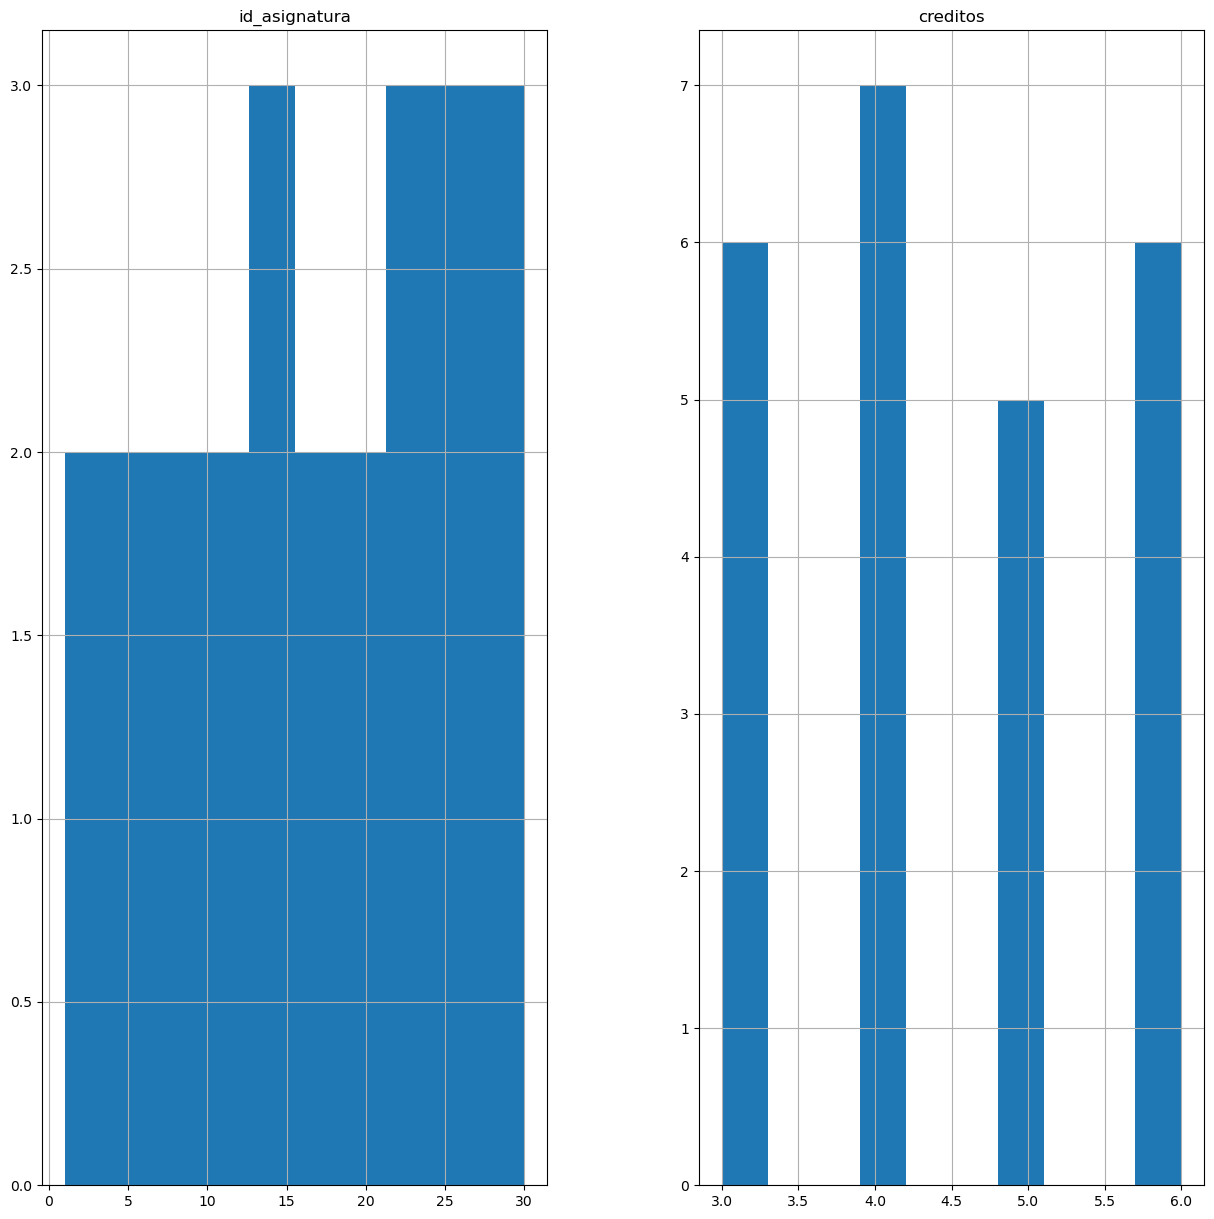

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
df_asig.hist(figsize=(15,15))
plt.show()

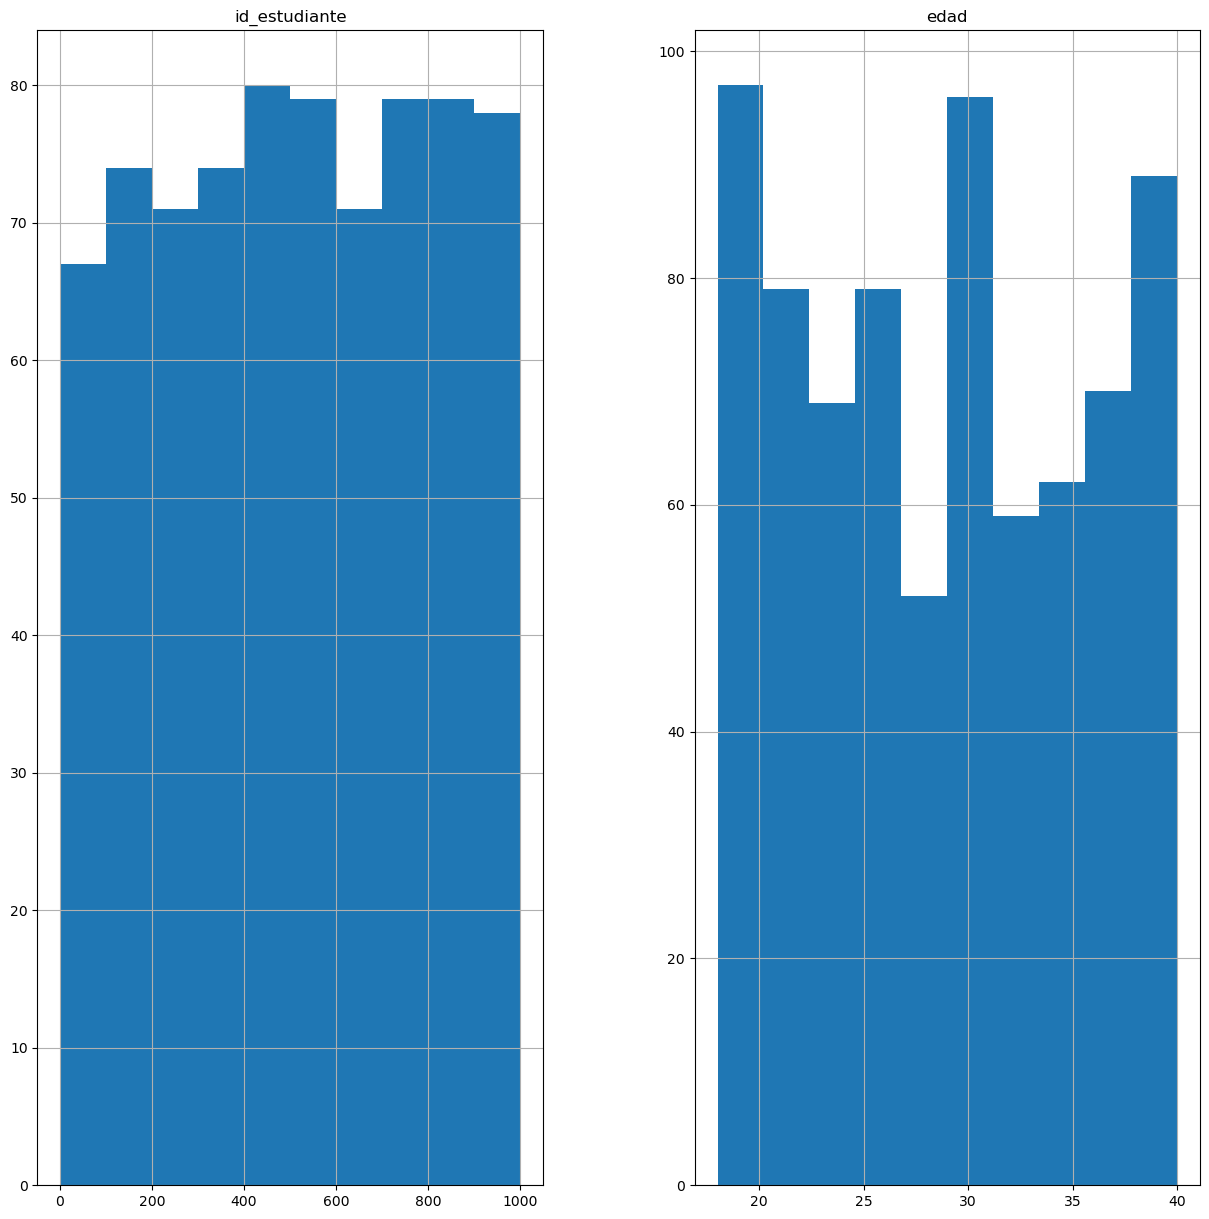

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
df_est.hist(figsize=(15,15))
plt.show()

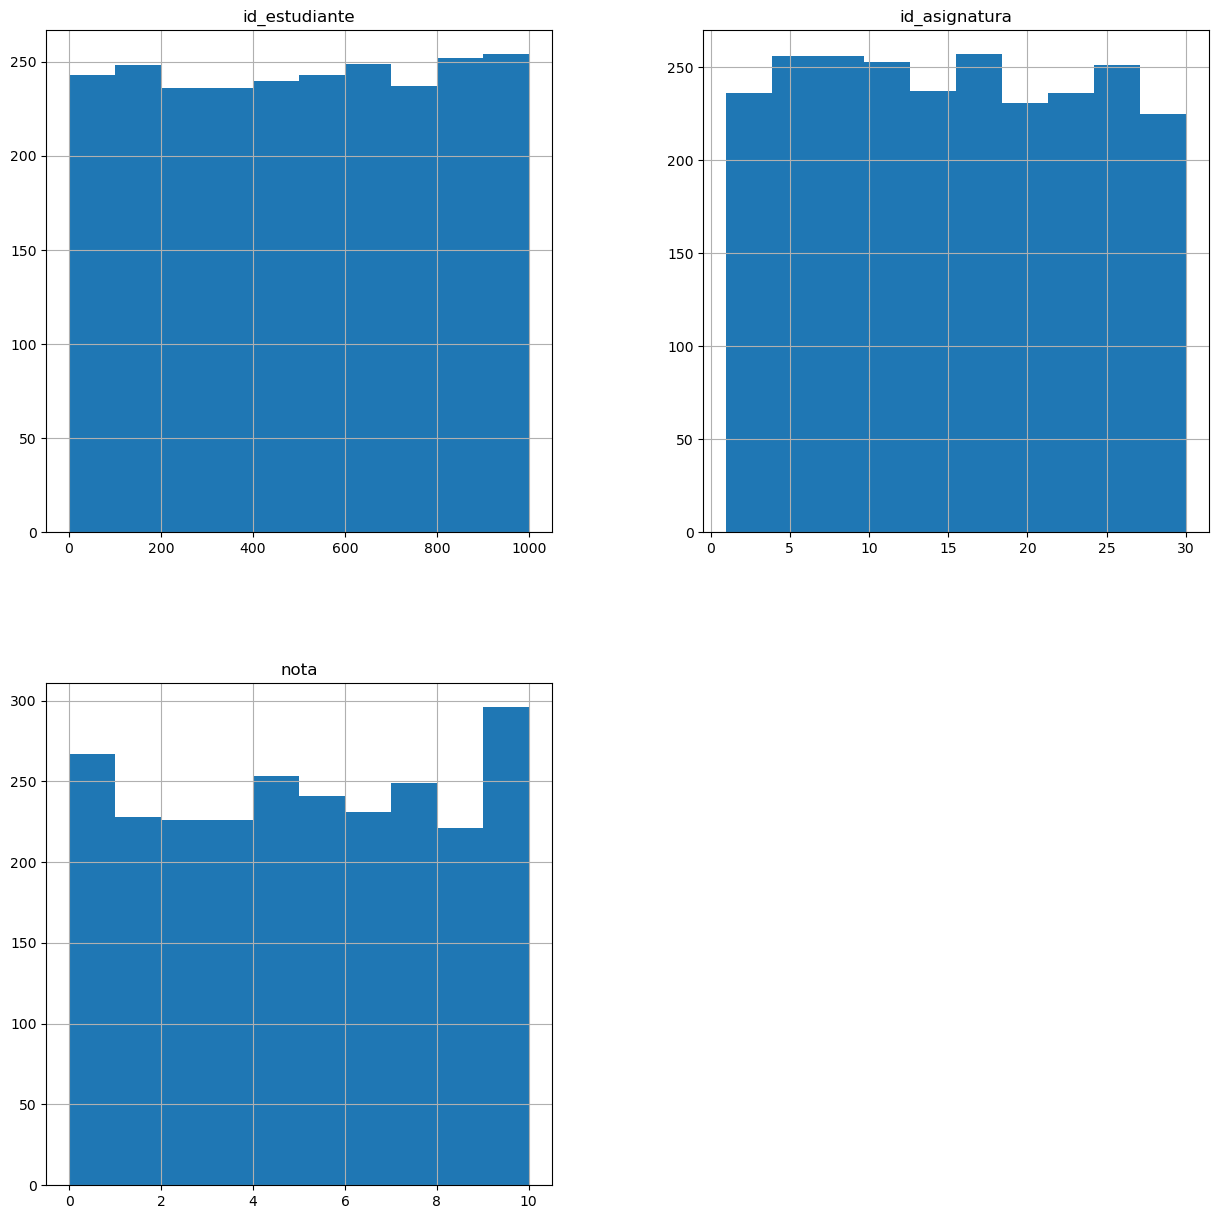

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
df_not.hist(figsize=(15,15))
plt.show()